### OTHMANE NABGOURI

### 1-Construction et Visualisation d'une arbre de décision

In [108]:
from sklearn import tree, naive_bayes, neighbors
from sklearn.datasets import load_iris,load_boston, load_digits, load_wine , load_diabetes , load_breast_cancer , make_moons
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from sklearn import model_selection
from tabulate import tabulate

In [109]:
iris = load_iris()
X= iris['data']
Y = iris['target']
TDTC = tree.DecisionTreeClassifier()
TDTC.fit(X,Y)

DecisionTreeClassifier()

In [110]:
tree.export_graphviz(TDTC, feature_names=iris['feature_names'])

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="petal length (cm) <= 2.45\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length (cm) <= 4.95\\ngini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]"] ;\n2 -> 3 ;\n4 [label="petal width (cm) <= 1.65\\ngini = 0.041\\nsamples = 48\\nvalue = [0, 47, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 47\\nvalue = [0, 47, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="petal width (cm) <= 1.55\\ngini = 0.444\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3]"] ;\n7 -> 8 ;\n9 [label="sepal leng

### Exportant la structure de l'arbre dans un fichier arbre.dot

In [111]:
tree.export_graphviz(TDTC,'./arbre.dot', feature_names=iris['feature_names'])

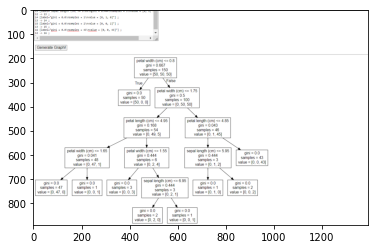

In [112]:
img = mpimg.imread('graph_decision_tree.png')
imgplot = plt.imshow(img)
plt.show()

### 2-Comparaison de classifieurs

In [113]:
### split data in train/test sets : pour ca on utilise Stratified ShuffleSplit cross-validator
selection = model_selection.StratifiedShuffleSplit(n_splits=1)
split = selection.split(X,Y)
training, test= next(split)



In [114]:
###apprentissage de l'arbre de décision 
TDTC = tree.DecisionTreeClassifier()
TDTC.fit(X[training], Y[training])
print("Score en utilisant l'apprentissage par arbre de decision: "+ str(TDTC.score(X[test], Y[test])))

Score en utilisant l'apprentissage par arbre de decision: 0.9333333333333333


In [115]:
###apprentissage du GaussianNB
NBG = naive_bayes.GaussianNB()
NBG.fit(X[training], Y[training])
print("Score en utilisant l'apprentissage par GaussianNB: "+ str(NBG.score(X[test], Y[test])))


Score en utilisant l'apprentissage par GaussianNB: 1.0


In [116]:
###apprentissage d'un KNeighborsClassifier
NKC = neighbors.KNeighborsClassifier()
NKC.fit(X[training], Y[training])
print("Score en utilisant l'apprentissage par KNeighborsClassifier : "+ str(NKC.score(X[test], Y[test])))



Score en utilisant l'apprentissage par KNeighborsClassifier : 0.9333333333333333


### Indicateur de performance plus fiable

In [117]:
### split data in train/test sets avec k=5 : 
selection = model_selection.StratifiedShuffleSplit(n_splits=5)


In [118]:
###5-fold pour l'arbre de décision :
k=5
score=[]
for training, test in selection.split(X, Y):
    TDTC = tree.DecisionTreeClassifier()
    TDTC.fit(X[training], Y[training])
    score.append(TDTC.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))


Accuracy: 0.933333 (+/- 0.000000)


In [119]:
###5-fold pour GaussianNB :
k=5
score=[]
for training, test in selection.split(X, Y):
    NBG = naive_bayes.GaussianNB()
    NBG.fit(X[training], Y[training])
    score.append(NBG.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.946667 (+/- 0.049889)


In [120]:
###5-fold pour KNeighborsClassifier :
k=5
score=[]
for training, test in selection.split(X, Y):
    NKC = neighbors.KNeighborsClassifier()
    NKC.fit(X[training], Y[training])
    score.append(NKC.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.973333 (+/- 0.053333)


### Comparaison sur plusieurs bases de données

### Load_digits

In [121]:
digits=load_digits()
X= digits['data']
Y = digits['target']


In [122]:
### split data in train/test sets avec k=5 : 
selection = model_selection.StratifiedShuffleSplit(n_splits=5)

In [123]:
###5-fold pour l'arbre de décision :
k=5
score=[]
for training, test in selection.split(X, Y):
    TDTC = tree.DecisionTreeClassifier()
    TDTC.fit(X[training], Y[training])
    score.append(TDTC.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.852222 (+/- 0.014316)


In [124]:
###5-fold pour GaussianNB :
k=5
score=[]
for training, test in selection.split(X, Y):
    NBG = naive_bayes.GaussianNB()
    NBG.fit(X[training], Y[training])
    score.append(NBG.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.847778 (+/- 0.027800)


In [125]:
###5-fold pour KNeighborsClassifier :
k=5
score=[]
for training, test in selection.split(X, Y):
    NKC = neighbors.KNeighborsClassifier()
    NKC.fit(X[training], Y[training])
    score.append(NKC.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.987778 (+/- 0.004157)


### Load_wine

In [126]:
wine=load_wine()
X= wine['data']
Y = wine['target']

In [127]:
### split data in train/test sets avec k=5 : 
selection = model_selection.StratifiedShuffleSplit(n_splits=5)

In [128]:
###5-fold pour l'arbre de décision :
k=5
score=[]
for training, test in selection.split(X, Y):
    TDTC = tree.DecisionTreeClassifier()
    TDTC.fit(X[training], Y[training])
    score.append(TDTC.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.955556 (+/- 0.054433)


In [129]:
###5-fold pour GaussianNB :
k=5
score=[]
for training, test in selection.split(X, Y):
    NBG = naive_bayes.GaussianNB()
    NBG.fit(X[training], Y[training])
    score.append(NBG.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.977778 (+/- 0.044444)


In [130]:
###5-fold pour KNeighborsClassifier :
k=5
score=[]
for training, test in selection.split(X, Y):
    NKC = neighbors.KNeighborsClassifier()
    NKC.fit(X[training], Y[training])
    score.append(NKC.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.677778 (+/- 0.081650)


### Load_breast_cancer

In [131]:
l_d=load_breast_cancer()
X= l_d['data']
Y = l_d['target']
### split data in train/test sets avec k=5 : 
selection = model_selection.StratifiedShuffleSplit(n_splits=5)

In [132]:
###5-fold pour l'arbre de décision :
k=5
score=[]
for training, test in selection.split(X, Y):
    TDTC = tree.DecisionTreeClassifier()
    TDTC.fit(X[training], Y[training])
    score.append(TDTC.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.901754 (+/- 0.040919)


In [133]:
###5-fold pour GaussianNB :
k=5
score=[]
for training, test in selection.split(X, Y):
    NBG = naive_bayes.GaussianNB()
    NBG.fit(X[training], Y[training])
    score.append(NBG.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.929825 (+/- 0.024811)


In [134]:
###5-fold pour KNeighborsClassifier :
k=5
score=[]
for training, test in selection.split(X, Y):
    NKC = neighbors.KNeighborsClassifier()
    NKC.fit(X[training], Y[training])
    score.append(NKC.score(X[test], Y[test])) 
print("Accuracy: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy: 0.950877 (+/- 0.047595)


### Analysant les resultas

In [135]:
table = [['Methode de classification/BD', 'IRIS', 'load_digits','load_wine','load_breast_cancer'], 
         ['DecisionTreeClassifier', '0.946667 (+/- 0.049889)', '0.856667 (+/- 0.022879)',' 0.922222 (+/- 0.056656)','0.940351 (+/-0.014035)'], 
         ['GaussianNB', '0.946667 (+/- 0.049889)', '0.842222 (+/- 0.047739)','0.988889 (+/- 0.022222)','0.926316 (+/-0.017189)'], 
         ['KNeighborsClassifier', '0.973333 (+/- 0.032660)', '0.988889 (+/- 0.003514)','0.677778 (+/- 0.041574)','0.940351 (+/-0.017891']]
print(tabulate(table))

----------------------------  -----------------------  -----------------------  -----------------------  ----------------------
Methode de classification/BD  IRIS                     load_digits              load_wine                load_breast_cancer
DecisionTreeClassifier        0.946667 (+/- 0.049889)  0.856667 (+/- 0.022879)  0.922222 (+/- 0.056656)  0.940351 (+/-0.014035)
GaussianNB                    0.946667 (+/- 0.049889)  0.842222 (+/- 0.047739)  0.988889 (+/- 0.022222)  0.926316 (+/-0.017189)
KNeighborsClassifier          0.973333 (+/- 0.032660)  0.988889 (+/- 0.003514)  0.677778 (+/- 0.041574)  0.940351 (+/-0.017891
----------------------------  -----------------------  -----------------------  -----------------------  ----------------------


In [136]:
###calculons la moyenne pour chaque méthode de classification:
print('moyenne pour DecisionTreeClassifier:  ' + str((0.946667+0.856667+0.922222+0.940351)/4))
print('moyenne pour GaussianNB:  ' + str((0.946667+0.842222+00.988889+0.926316)/4))
print('moyenne pour KNeighborsClassifier:  ' + str((0.973333 +0.988889+0.677778+0.940351 )/4))



moyenne pour DecisionTreeClassifier:  0.9164767500000001
moyenne pour GaussianNB:  0.9260235
moyenne pour KNeighborsClassifier:  0.8950877500000001


In [137]:
PRINT1='Donc le meilleur modele est le modéle gaussien parceque la plupart des données sont generes en utilisant une loi normal .'
PRINT2 = 'On remarque que pour load_digits , la plus faible performance est avec le modéle gaussien .'
PRINT3 = 'Conclusion : pour chaque jeux de données , il faut tester tout les modéles , et choisir le modéle dont la performance la plus élevés.'



In [138]:
print( PRINT1 + PRINT2 + PRINT3 )

Donc le meilleur modele est le modéle gaussien parceque la plupart des données sont generes en utilisant une loi normal .On remarque que pour load_digits , la plus faible performance est avec le modéle gaussien .Conclusion : pour chaque jeux de données , il faut tester tout les modéles , et choisir le modéle dont la performance la plus élevés.


### 3-Visualiser les frontières de décision

### Générant une base de donnée


In [165]:
X,Y = make_moons([500, 500], noise=0.2)

In [166]:
###lancant l'apprentissage sur cette base
"arbre de décision"
TDTC = tree.DecisionTreeClassifier()
TDTC.fit(X, Y)
'gaussienNB'
NBG = naive_bayes.GaussianNB()
NBG.fit(X, Y)
'KNeighborsClassifier'
NKC = neighbors.KNeighborsClassifier()
NKC.fit(X, Y)

KNeighborsClassifier()

In [167]:
def plot_decision_frontiers(modele, donnee, labels,shape_):
    lx = np.linspace(np.min(donnee[:, 0]), np.max(donnee[:, 0]), shape_)
    ly = np.linspace(np.min(donnee[:, 1]), np.max(donnee[:, 1]), shape_)
    x, y = np.meshgrid(lx, ly)
    tr = np.array([x.flatten(), y.flatten()]).transpose((1, 0))
    z = modele.predict(tr)
    z = z.reshape(shape_, shape_)
    plt.contourf(x, y, z)
    for i in np.unique(labels):
        plt.scatter(donnee[labels == i, 0], donnee[labels == i, 1])


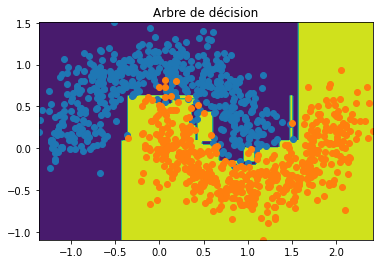

In [168]:
plt.title("Arbre de décision")
plot_decision_frontiers(TDTC, X, Y,160)
plt.show()

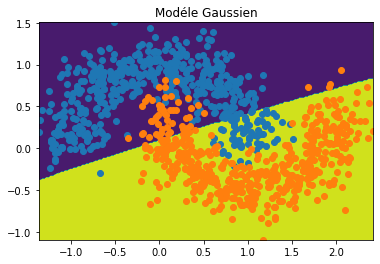

In [169]:
plt.title("Modéle Gaussien")
plot_decision_frontiers(NBG, X, Y,160)
plt.show()

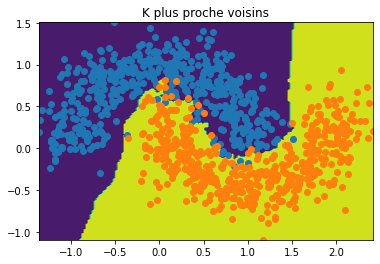

In [170]:
plt.title("K plus proche voisins")
plot_decision_frontiers(NKC, X, Y,160)
plt.show()

### 4-Étude de paramètres

### Analyse de l’effet du critère de partitionnement

In [151]:
X, Y = make_moons([1000, 1000], noise=0.3)

In [152]:
###Apprentissage avec le critére gini
TDTC_gini = tree.DecisionTreeClassifier(criterion="gini")
TDTC_gini.fit(X, Y)
###Apprentissage avec le critére entropy
TDTC_entropy = tree.DecisionTreeClassifier(criterion="entropy")
TDTC_entropy.fit(X, Y)



DecisionTreeClassifier(criterion='entropy')

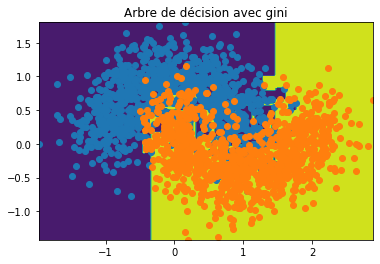

In [153]:
###Frontiére de décision avec le critére gini
plt.title("Arbre de décision avec gini")
plot_decision_frontiers(TDTC_gini, X, Y,160)
plt.show()

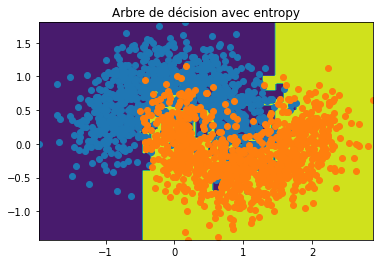

In [154]:
###Frontiére de décision avec le critére entropy
plt.title("Arbre de décision avec entropy")
plot_decision_frontiers(TDTC_entropy, X, Y,160)
plt.show()

### Estimation des performances 

In [155]:
#split data in train/test sets avec k=5 : 
selection = model_selection.StratifiedShuffleSplit(n_splits=5)

In [156]:
###PERFORMANCE AVEC LE CRITERE GINI :

k=5
score=[]
for training, test in selection.split(X, Y):
    TDTC_GINI = tree.DecisionTreeClassifier(criterion="gini")
    TDTC_GINI.fit(X[training], Y[training])
    score.append(TDTC_GINI.score(X[test], Y[test])) 
print("Accuracy using gini: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy using gini: 0.855000 (+/- 0.019494)


In [157]:
 ###PERFORMANCE AVEC LE CRITERE GINI :

k=5
score=[]
for training, test in selection.split(X, Y):
    TDTC_entropy = tree.DecisionTreeClassifier(criterion="entropy")
    TDTC_entropy.fit(X[training], Y[training])
    score.append(TDTC_entropy.score(X[test], Y[test])) 
print("Accuracy using gini: {:f} (+/- {:f})".format(np.mean(score), np.std(score)))

Accuracy using gini: 0.877000 (+/- 0.018601)


In [158]:
print("On conclut que les deux critere ont un peu les memes performances , Mais personnelement j'utilise plus le gini car il a des valeurs entre 0 et 0.5 , ce qui lui donne ue meilleur impurité que l'entropie qui a des valeurs entre 0 et 1.")

On conclut que les deux critere ont un peu les memes performances , Mais personnelement j'utilise plus le gini car il a des valeurs entre 0 et 0.5 , ce qui lui donne ue meilleur impurité que l'entropie qui a des valeurs entre 0 et 1.


## Evolution des performances 

### profondeur maximum

In [159]:
###Varier la valeur de profondeur maximum max_depth et calculant a chaque fois le score :


k=5
moyenne_des_scores=[]
for p in range(1,30):
    score_p=[]
    for training, test in selection.split(X, Y):
        TDTC = tree.DecisionTreeClassifier(max_depth=p)
        TDTC.fit(X[training], Y[training])
        score_p.append(TDTC.score(X[test], Y[test])) 
    moyenne_des_scores.append(np.mean(score_p))

print("Les moyennes des scores en variant la pronfendeur maximum: " + str(moyenne_des_scores))


Les moyennes des scores en variant la pronfendeur maximum: [0.807, 0.889, 0.883, 0.8960000000000001, 0.9030000000000001, 0.9039999999999999, 0.8880000000000001, 0.8879999999999999, 0.877, 0.8630000000000001, 0.8640000000000001, 0.858, 0.8700000000000001, 0.874, 0.884, 0.857, 0.861, 0.858, 0.8530000000000001, 0.8760000000000001, 0.8720000000000001, 0.8470000000000001, 0.8629999999999999, 0.8780000000000001, 0.877, 0.867, 0.874, 0.8559999999999999, 0.867]


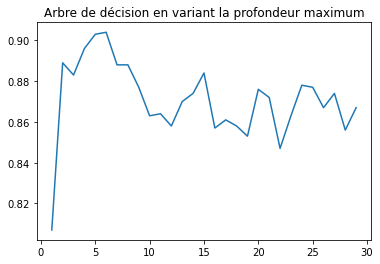

In [160]:
plt.title("Arbre de décision en variant la profondeur maximum")
plt.plot(range(1,30), moyenne_des_scores)
plt.show()

In [161]:
print('On constate que la performance du modele depend de la profendeur maximum ')
print("Plus on augmente la profendeur , plus l'arbre va devenir complex , mais a un moment donnée , on va commencer a faire du sur-apprentissage , ce qui explique le décroit de la courbe à la fin .")

On constate que la performance du modele depend de la profendeur maximum 
Plus on augmente la profendeur , plus l'arbre va devenir complex , mais a un moment donnée , on va commencer a faire du sur-apprentissage , ce qui explique le décroit de la courbe à la fin .


### Nombre minimum de données par feuille

In [162]:
k=5
moyenne_des_scores_min=[]
for m in range(1,50):
    score_p=[]
    for training, test in selection.split(X, Y):
        TDTC = tree.DecisionTreeClassifier(min_samples_leaf=m/100)
        TDTC.fit(X[training], Y[training])
        score_p.append(TDTC.score(X[test], Y[test])) 
    moyenne_des_scores_min.append(np.mean(score_p))

print("Les moyennes des scores en variant le nombre min de donnée par feuille: " + str(moyenne_des_scores_min))

Les moyennes des scores en variant le nombre min de donnée par feuille: [0.9199999999999999, 0.9119999999999999, 0.905, 0.9109999999999999, 0.905, 0.865, 0.8450000000000001, 0.8480000000000001, 0.8299999999999998, 0.8240000000000001, 0.818, 0.787, 0.8100000000000002, 0.8029999999999999, 0.791, 0.8150000000000001, 0.7969999999999999, 0.8160000000000001, 0.8029999999999999, 0.8, 0.829, 0.8, 0.808, 0.827, 0.8130000000000001, 0.8010000000000002, 0.7969999999999999, 0.798, 0.812, 0.8009999999999999, 0.792, 0.8, 0.8140000000000001, 0.784, 0.795, 0.82, 0.798, 0.8320000000000001, 0.818, 0.799, 0.8039999999999999, 0.8150000000000001, 0.812, 0.806, 0.82, 0.8300000000000001, 0.8080000000000002, 0.808, 0.805]


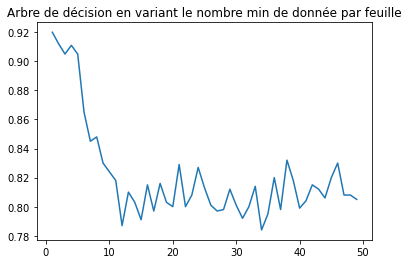

In [163]:
plt.title("Arbre de décision en variant le nombre min de donnée par feuille")
plt.plot(range(1,50), moyenne_des_scores_min)
plt.show()

In [164]:
print("On remarque que dès qu'on augmente le nombre minimum de donnée par feuille , la performence diminue." )

On remarque que dès qu'on augmente le nombre minimum de donnée par feuille , la performence diminue.
